In [ ]:
def warn(*arg,**kwargs):
    pass
import warnings 
warnings.warn=warn

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
boston=pickle.load(open('boston_housing_clean.pickle','rb'))

In [ ]:
boston.keys()

In [ ]:
boston_data = boston['dataframe']
boston_description = boston['description']

In [ ]:
boston_data.head()

In [ ]:
X=boston_data.drop('MEDV',axis=1)
Y=boston_data.MEDV

In [ ]:
kf=KFold(shuffle=True,random_state=72018,n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
    print("Train index :",train_index[:10], len(train_index))
    print("Test index :", test_index[:10],len(test_index))
    print('')

In [ ]:
scores =[]
LR=LinearRegression()

for train_index,test_index in kf.split(X):
    X_train,X_test,Y_train,Y_test=(X.iloc[train_index,:],
                                   X.iloc[test_index, :],
                                   Y[train_index],
                                   Y[test_index])
    LR.fit(X_train,Y_train)
    Y_pred=LR.predict(X_test)
    score=r2_score(Y_test.values,Y_pred)
    scores.append(score)
    
scores

In [ ]:
scores =[]
LR=LinearRegression()
s=StandardScaler()

for train_index,test_index in kf.split(X):
    X_train,X_test,Y_train,Y_test=(X.iloc[train_index,:],
                                   X.iloc[test_index, :],
                                   Y[train_index],
                                    Y[test_index])
    X_train_s=s.fit_transform(X_train)
    LR.fit(X_train_s,Y_train)
    
    X_test_s=s.fit_transform(X_test)
    Y_pred=LR.predict(X_test_s)
    
    score=r2_score(Y_test.values,Y_pred)
    scores.append(score)
    
scores

In [ ]:
s =StandardScaler()
LR=LinearRegression()

In [ ]:
estimator=Pipeline([('scaler',s),('Regression',LR)])

In [ ]:
estimator.fit(X_train,Y_train)

In [ ]:
estimator.predict(X_test)

In [ ]:
kf

In [ ]:
predictions= cross_val_predict(estimator,X,Y,cv=kf)

In [ ]:
len(predictions)

In [ ]:
r2_score(Y,predictions)

In [ ]:
np.mean(scores)

In [ ]:
np.geomspace(1,27,4)

In [ ]:
alphas=np.geomspace(1e-9,1e0,num=10)
alphas

In [ ]:
scores=[]
coefs=[]
for alpha in alphas:
    las = Lasso(alpha= alpha ,max_iter=100000)

    estimator=Pipeline([('s',s),('lasso_regression',las)])
    predictions = cross_val_predict(estimator,X,Y,cv=kf)
    score=r2_score(Y,predictions)
    scores.append(score)

In [ ]:
list(zip(alphas,scores))

In [ ]:
Lasso(alpha=1e-6).fit(X,Y).coef_

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [54]:
scores=[]

pf=PolynomialFeatures()
alphas=np.geomspace(0.001,10,5)
for alpha in alphas:
    las = Lasso(alpha= alpha ,max_iter=100000)

    estimator=Pipeline([('make_higher_degree',pf),
                        ('scaler',s),
                        ('lasso_regression',las)])
    predictions = cross_val_predict(estimator,X,Y,cv=kf)
    score=r2_score(Y,predictions)
    scores.append(score)

In [55]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [56]:
scores

[0.8465056899967298,
 0.8552553819994727,
 0.8124536477296069,
 0.7090474482089187,
 -0.000616160136140298]

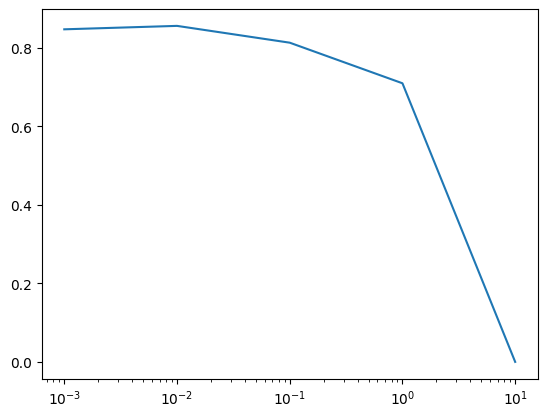

In [57]:
plt.semilogx(alphas,scores)

In [58]:
best_estimator=Pipeline([('make_higher_degree',PolynomialFeatures(degree=2)),
                        ('scaler',s),
                        ('lasso_regression',Lasso(alpha=0.01,max_iter=10000))])

best_estimator.fit(X,Y)
best_estimator.score(X,Y)

0.9032551408154241

In [59]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.61127587e+00,  0.00000000e+00,  6.24240557e-01,  0.00000000e+00,
       -7.22878514e+00,  9.74968793e+00,  0.00000000e+00,  0.00000000e+00,
        6.34548325e-01,  0.00000000e+00,  9.95741679e-01, -5.51374291e-03,
       -0.00000000e+00,  2.44370838e+00, -2.40444044e+00, -0.00000000e+00,
       -0.00000000e+00, -2.23044443e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.88128934e-01,  5.17203914e-01,  3.07715719e-01,
       -3.39853933e-01, -9.86590910e-02, -0.00000000e+00,  2.72847487e-01,
       -0.00000000e+00, -6.39829763e-01, -3.16474346e-01,  1.44555554e+00,
        0.00000000e+00, -0.00000000e+00, -8.84630187e-01,  1.32081558e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.63148300e+00,
       -2.62941147e-01,  0.00000000e+00,  9.08410143e-01, -8.17144528e-01,
        0.00000000e+00, -4.31628234e+00,  5.53254405e-01, -2.91912598e+00,
       -4.68486241e+00,  

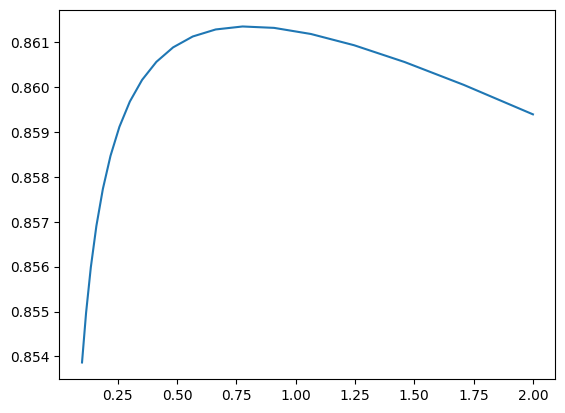

In [60]:
scores=[]

pf=PolynomialFeatures()
alphas=np.geomspace(0.1,2,20)
for alpha in alphas:
    ridge = Ridge(alpha= alpha ,max_iter=100000)

    estimator=Pipeline([('make_higher_degree',pf),
                        ('scaler',s),
                        ('ridge_regression',ridge)])
    predictions = cross_val_predict(estimator,X,Y,cv=kf)
    score=r2_score(Y,predictions)
    scores.append(score)
plt.plot(alphas,scores)

In [62]:
best_estimator = Pipeline([
                    ("make_higher_degree", PolynomialFeatures(degree=2,include_bias=False)),
                    ("scaler", s),
                    ("lasso_regression", Lasso(alpha=0.01))])

best_estimator.fit(X, Y)
best_estimator.score(X, Y)

0.9047578542960124

In [68]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}
grid = GridSearchCV(estimator, params, cv=kf)

In [69]:
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [70]:
grid.best_score_,grid.best_params_

(0.8546333782070438,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [73]:
Y_predict=grid.predict(X)

In [74]:
r2_score(Y,Y_predict)

0.8964707714558101

In [75]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  2.47147038e-01, -1.18377806e+00,  1.11700133e+00,
        1.02268931e+00,  1.11573592e+00,  2.63515343e+00,  1.60400844e+00,
       -2.44378403e+00,  2.67549673e+00,  1.18120641e+00,  3.00931414e-01,
        7.17164316e-01,  5.46697603e-01,  1.16368605e+00,  2.78583120e-01,
        4.15770986e-01,  2.45396270e+00, -1.07012228e+00, -8.15812777e-01,
       -2.95036466e-01, -8.26480829e-01, -4.23552596e-01, -4.33022591e-02,
        8.34930099e-02, -4.92838202e-01,  5.12447325e-01,  5.88355149e-01,
       -3.50662224e-01, -1.39184102e-01, -2.99737738e-01,  1.02696466e+00,
        1.47705864e-02, -6.87593891e-01, -3.12176710e-01,  1.26476807e+00,
        1.01258007e+00, -5.51925730e-01, -8.62269698e-01,  8.78832853e-01,
        6.75975245e-02,  5.91362874e-01, -1.45086000e+00,  1.09286634e+00,
       -7.69112663e-01,  1.16978387e+00,  1.29460196e+00, -7.36888615e-01,
        7.29205860e-01, -2.44086792e+00,  1.02268931e+00, -2.26162754e+00,
       -2.56091292e+00,  

In [76]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomial_features__degree,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016932,0.004872,0.005034,0.002202,1,4.0,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672111,0.748235,0.701801,0.707382,0.031327,90
1,0.012256,0.006268,0.003668,0.000475,1,4.228267,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672103,0.748207,0.701986,0.707432,0.031307,89
2,0.002542,0.003595,0.000000,0.000000,1,4.46956,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672093,0.748175,0.702178,0.707482,0.031286,88
3,0.010418,0.007367,0.000000,0.000000,1,4.724624,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672081,0.748141,0.702375,0.707533,0.031265,87
4,0.005205,0.007360,0.000000,0.000000,1,4.994243,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672067,0.748104,0.702579,0.707583,0.031243,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.020840,0.007365,0.000000,0.000000,3,16.018444,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827782,0.867759,0.859693,0.851745,0.017261,23
86,0.020832,0.007366,0.000000,0.000000,3,16.932565,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827717,0.867351,0.859455,0.851508,0.017129,25
87,0.020841,0.007336,0.005203,0.007358,3,17.898852,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827628,0.866926,0.859179,0.851244,0.016996,27
88,0.023519,0.006384,0.005014,0.004547,3,18.920281,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827515,0.866483,0.858866,0.850955,0.016863,30
